# Decision Tree
# Problem Statement:
# A cloth manufacturing company is interested to know about the segment or attributes causes high sale. Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.

In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing 

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


In [2]:
#import Data
Data = pd.read_csv('Company_Data.csv')

In [3]:
Data

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0     9.50        138      73           11         276    120       Bad   42   
1    11.22        111      48           16         260     83      Good   65   
2    10.06        113      35           10         269     80    Medium   59   
3     7.40        117     100            4         466     97    Medium   55   
4     4.15        141      64            3         340    128       Bad   38   
..     ...        ...     ...          ...         ...    ...       ...  ...   
395  12.57        138     108           17         203    128      Good   33   
396   6.14        139      23            3          37    120    Medium   55   
397   7.41        162      26           12         368    159    Medium   40   
398   5.94        100      79            7         284     95       Bad   50   
399   9.71        134      37            0          27    120      Good   49   

     Education Urban   US  
0           17   Yes  Yes  
1           10   Yes  Yes  
2           12   Yes  Yes  
3           14   Yes  Yes  
4           13   Yes   No  
..         ...   ...  ...  
395         14   Yes  Yes  
396         11    No  Yes  
397         18   Yes  Yes  
398         12   Yes  Yes  
399         16   Yes  Yes  

[400 rows x 11 columns]

# EDA

In [4]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [5]:
Data.describe()

Sales   CompPrice      Income  Advertising  Population  \
count  400.000000  400.000000  400.000000   400.000000  400.000000   
mean     7.496325  124.975000   68.657500     6.635000  264.840000   
std      2.824115   15.334512   27.986037     6.650364  147.376436   
min      0.000000   77.000000   21.000000     0.000000   10.000000   
25%      5.390000  115.000000   42.750000     0.000000  139.000000   
50%      7.490000  125.000000   69.000000     5.000000  272.000000   
75%      9.320000  135.000000   91.000000    12.000000  398.500000   
max     16.270000  175.000000  120.000000    29.000000  509.000000   

            Price         Age   Education  
count  400.000000  400.000000  400.000000  
mean   115.795000   53.322500   13.900000  
std     23.676664   16.200297    2.620528  
min     24.000000   25.000000   10.000000  
25%    100.000000   39.750000   12.000000  
50%    117.000000   54.500000   14.000000  
75%    131.000000   66.000000   16.000000  
max    191.000000   80.000000   18.000000

In [6]:
Data.duplicated().drop_duplicates()

0    False
dtype: bool

In [71]:
Data.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [72]:
Data.nunique()

Sales          336
CompPrice       73
Income          98
Advertising     28
Population     275
Price          101
ShelveLoc        3
Age             56
Education        9
Urban            2
US               2
dtype: int64

In [73]:
Data["ShelveLoc"].unique()

array(['Bad', 'Good', 'Medium'], dtype=object)

In [74]:
Data["Urban"].unique()

array(['Yes', 'No'], dtype=object)

In [75]:
Data["US"].unique()

array(['Yes', 'No'], dtype=object)

In [76]:
Data.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [77]:
list(Data.columns)

['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban',
 'US']

In [78]:
Data['ShelveLoc'].value_counts()

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64

In [79]:
Data['Urban'].value_counts()

Yes    282
No     118
Name: Urban, dtype: int64

In [80]:
Data['US'].value_counts()

Yes    258
No     142
Name: US, dtype: int64

In [86]:
#groupby
Data.groupby(['ShelveLoc','Urban','US']).count()

Sales  CompPrice  Income  Advertising  Population  Price  \
ShelveLoc Urban US                                                             
0         0     0      11         11      11           11          11     11   
                1      11         11      11           11          11     11   
          1     0      23         23      23           23          23     23   
                1      51         51      51           51          51     51   
1         0     0       6          6       6            6           6      6   
                1      22         22      22           22          22     22   
          1     0      18         18      18           18          18     18   
                1      39         39      39           39          39     39   
2         0     0      29         29      29           29          29     29   
                1      39         39      39           39          39     39   
          1     0      55         55      55           55          55     55   
                1      96         96      96           96          96     96   

                    Age  Education  
ShelveLoc Urban US                  
0         0     0    11         11  
                1    11         11  
          1     0    23         23  
                1    51         51  
1         0     0     6          6  
                1    22         22  
          1     0    18         18  
                1    39         39  
2         0     0    29         29  
                1    39         39  
          1     0    55         55  
                1    96         96

In [87]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
Data['ShelveLoc']= label_encoder.fit_transform(Data['ShelveLoc']) 
Data['Urban']= label_encoder.fit_transform(Data['Urban'])
Data['US']= label_encoder.fit_transform(Data['US'])

In [85]:
Data['Sales'].mean()

7.496325

In [88]:
Data['High']=Data.Sales.map(lambda x: 1 if x >7.49 else 0)

In [89]:
Data.drop('Sales',inplace=True,axis=1)

In [90]:
Data.rename(columns={'High':'Sales'},inplace=True)

In [91]:
Data.head()

CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0        138      73           11         276    120          0   42   
1        111      48           16         260     83          1   65   
2        113      35           10         269     80          2   59   
3        117     100            4         466     97          2   55   
4        141      64            3         340    128          0   38   

   Education  Urban  US  Sales  
0         17      1   1      1  
1         10      1   1      1  
2         12      1   1      1  
3         14      1   1      0  
4         13      1   0      0

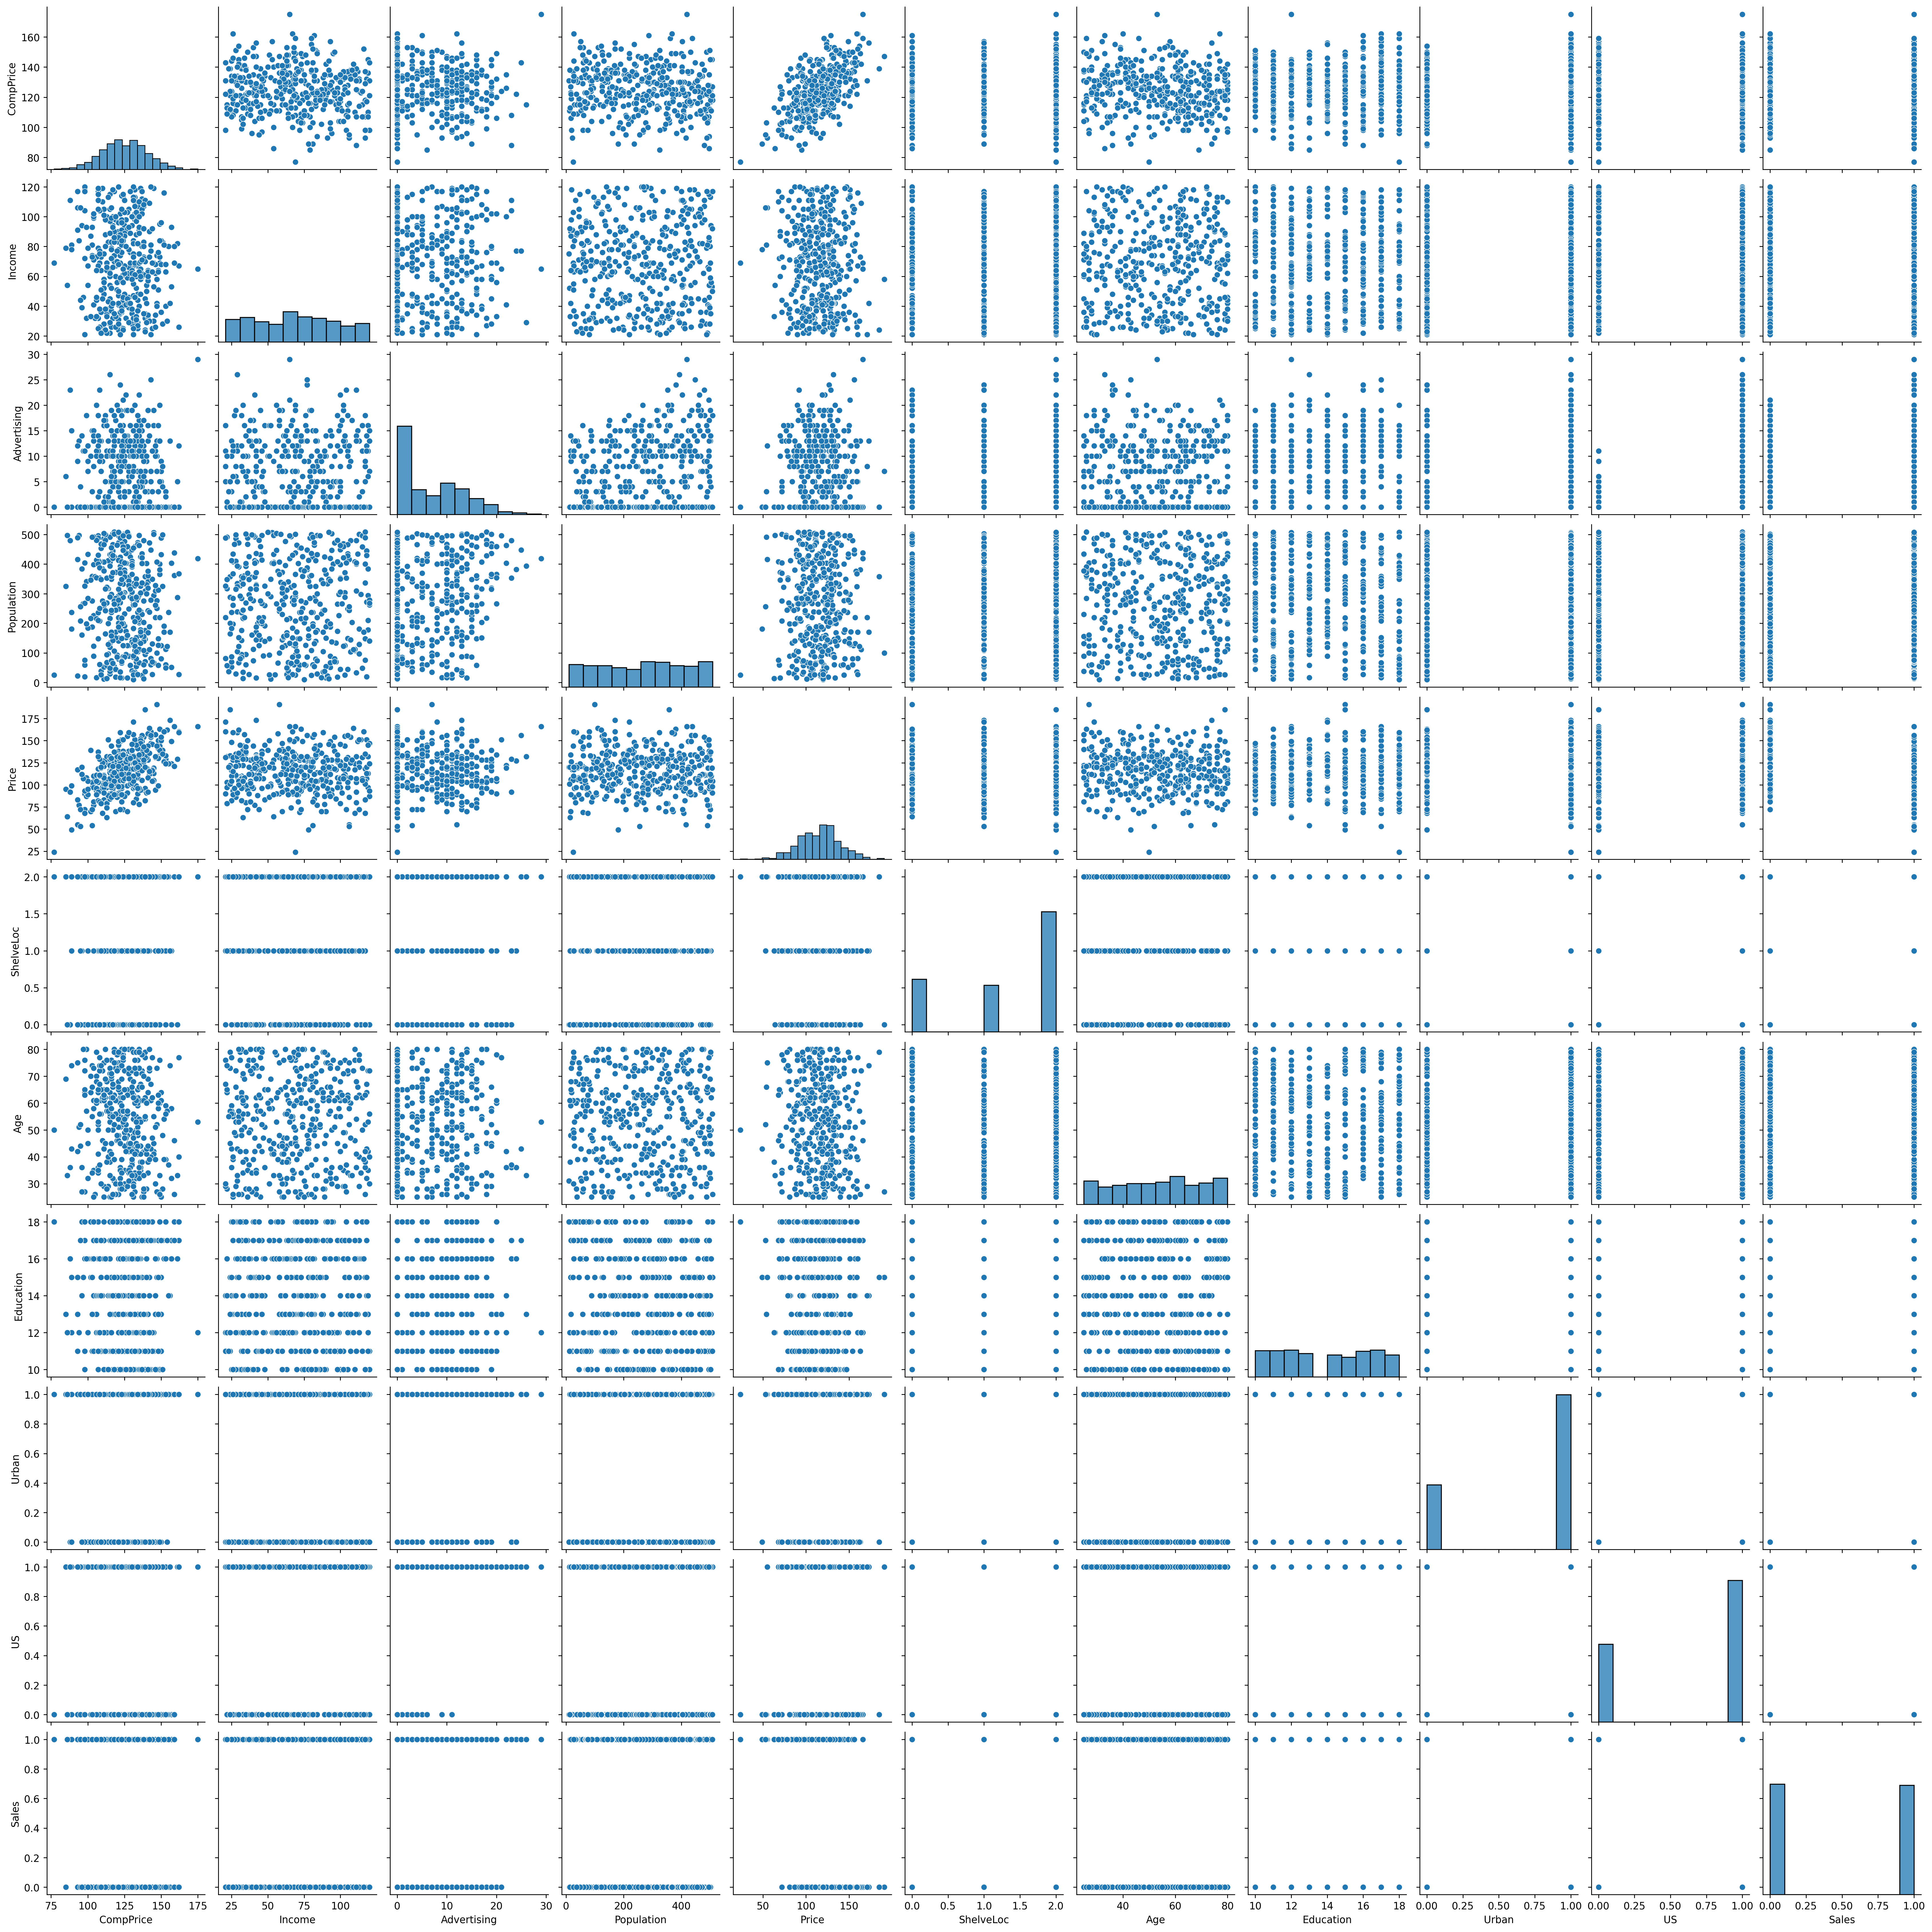

In [92]:
import seaborn as sns 
sns.pairplot(Data)

In [43]:
Data2 = Data.copy()
Data2

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0     9.50        138      73           11         276    120       Bad   42   
1    11.22        111      48           16         260     83      Good   65   
2    10.06        113      35           10         269     80    Medium   59   
3     7.40        117     100            4         466     97    Medium   55   
4     4.15        141      64            3         340    128       Bad   38   
..     ...        ...     ...          ...         ...    ...       ...  ...   
395  12.57        138     108           17         203    128      Good   33   
396   6.14        139      23            3          37    120    Medium   55   
397   7.41        162      26           12         368    159    Medium   40   
398   5.94        100      79            7         284     95       Bad   50   
399   9.71        134      37            0          27    120      Good   49   

     Education Urban   US  
0           17   Yes  Yes  
1           10   Yes  Yes  
2           12   Yes  Yes  
3           14   Yes  Yes  
4           13   Yes   No  
..         ...   ...  ...  
395         14   Yes  Yes  
396         11    No  Yes  
397         18   Yes  Yes  
398         12   Yes  Yes  
399         16   Yes  Yes  

[400 rows x 11 columns]

<AxesSubplot:>

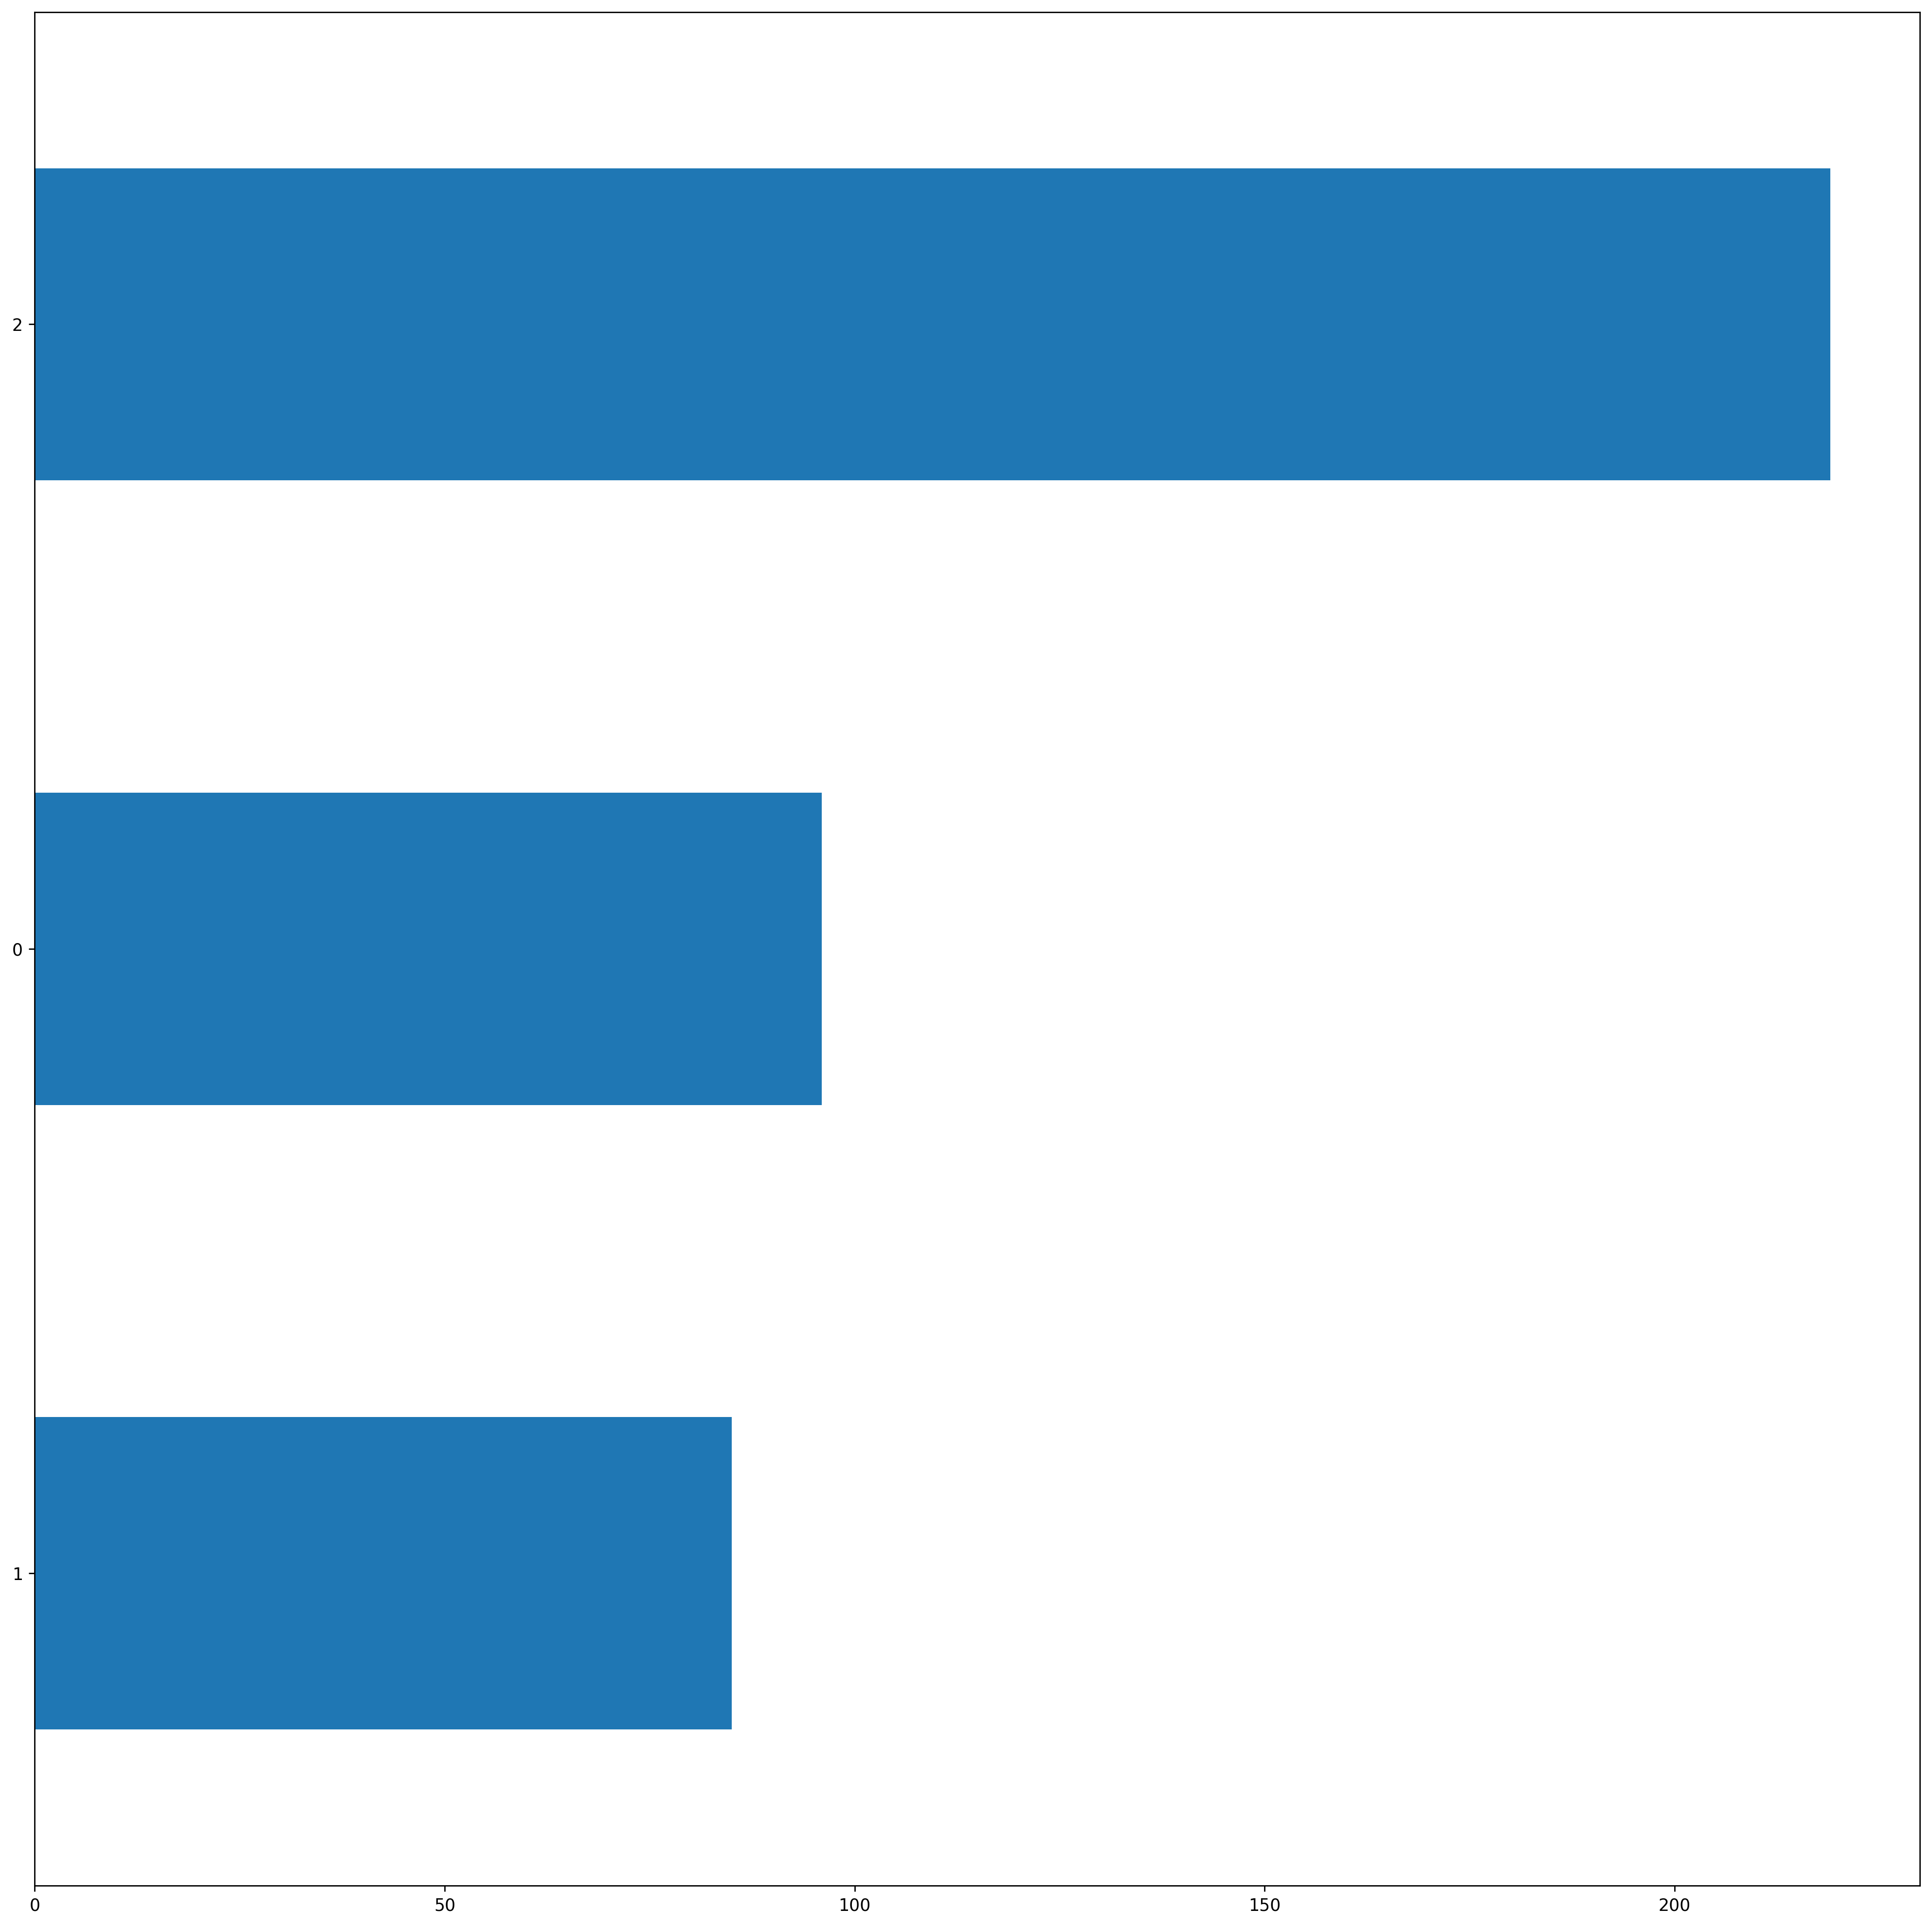

In [93]:
# 0>>Bad,1>>>Good,2>>>Medium
Data["ShelveLoc"].value_counts(ascending=True).plot(kind='barh')

In [94]:
x = Data.iloc[:,:-1]
y = Data['Sales']

In [95]:
x

CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0          138      73           11         276    120          0   42   
1          111      48           16         260     83          1   65   
2          113      35           10         269     80          2   59   
3          117     100            4         466     97          2   55   
4          141      64            3         340    128          0   38   
..         ...     ...          ...         ...    ...        ...  ...   
395        138     108           17         203    128          1   33   
396        139      23            3          37    120          2   55   
397        162      26           12         368    159          2   40   
398        100      79            7         284     95          0   50   
399        134      37            0          27    120          1   49   

     Education  Urban  US  
0           17      1   1  
1           10      1   1  
2           12      1   1  
3           14      1   1  
4           13      1   0  
..         ...    ...  ..  
395         14      1   1  
396         11      0   1  
397         18      1   1  
398         12      1   1  
399         16      1   1  

[400 rows x 10 columns]

In [96]:
y

0      1
1      1
2      1
3      0
4      0
      ..
395    1
396    0
397    0
398    0
399    1
Name: Sales, Length: 400, dtype: int64

In [97]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.20, random_state=3)

In [98]:
xtrain

CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
239        123     105            0         149    118          0   62   
188        116      37            0         426     90          2   76   
240        159      80            0         362    121          2   26   
23         121      31            0         292    109          2   79   
343        117      42           10         371    121          0   26   
..         ...     ...          ...         ...    ...        ...  ...   
256        147      40            0         277    144          2   73   
131        108      69            3         208     94          2   77   
249        125      67            0          86    117          0   65   
152        128      78            0         341    128          1   45   
362        131      55            0          26    110          0   79   

     Education  Urban  US  
239         16      1   1  
188         15      1   0  
240         18      1   0  
23          10      1   0  
343         14      1   1  
..         ...    ...  ..  
256         10      1   0  
131         16      1   0  
249         11      1   0  
152         13      0   0  
362         12      1   1  

[320 rows x 10 columns]

In [99]:
xtest

CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
376        141      60           19         319     92          1   44   
16         118      32            0         284    110          1   63   
365        154      30            0         122    162          2   57   
82         151      83            4         325    139          1   28   
107        134     107            0         104    108          2   60   
..         ...     ...          ...         ...    ...        ...  ...   
246        120      56           20         266     90          0   78   
10         121      78            9         150    100          0   26   
115        139      35            0          95    129          2   42   
74         150      68            5         125    136          2   64   
194        112      98           18         481    128          2   45   

     Education  Urban  US  
376         11      1   1  
16          13      1   0  
365         17      0   0  
82          17      1   1  
107         12      1   0  
..         ...    ...  ..  
246         18      1   1  
10          10      0   1  
115         13      1   0  
74          13      0   1  
194         11      1   1  

[80 rows x 10 columns]

# Decision Tree model

# Building Decision Tree Classifier using Entropy Criteria

In [100]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=6)
model.fit(xtrain,ytrain) 

DecisionTreeClassifier(criterion='entropy', max_depth=6)

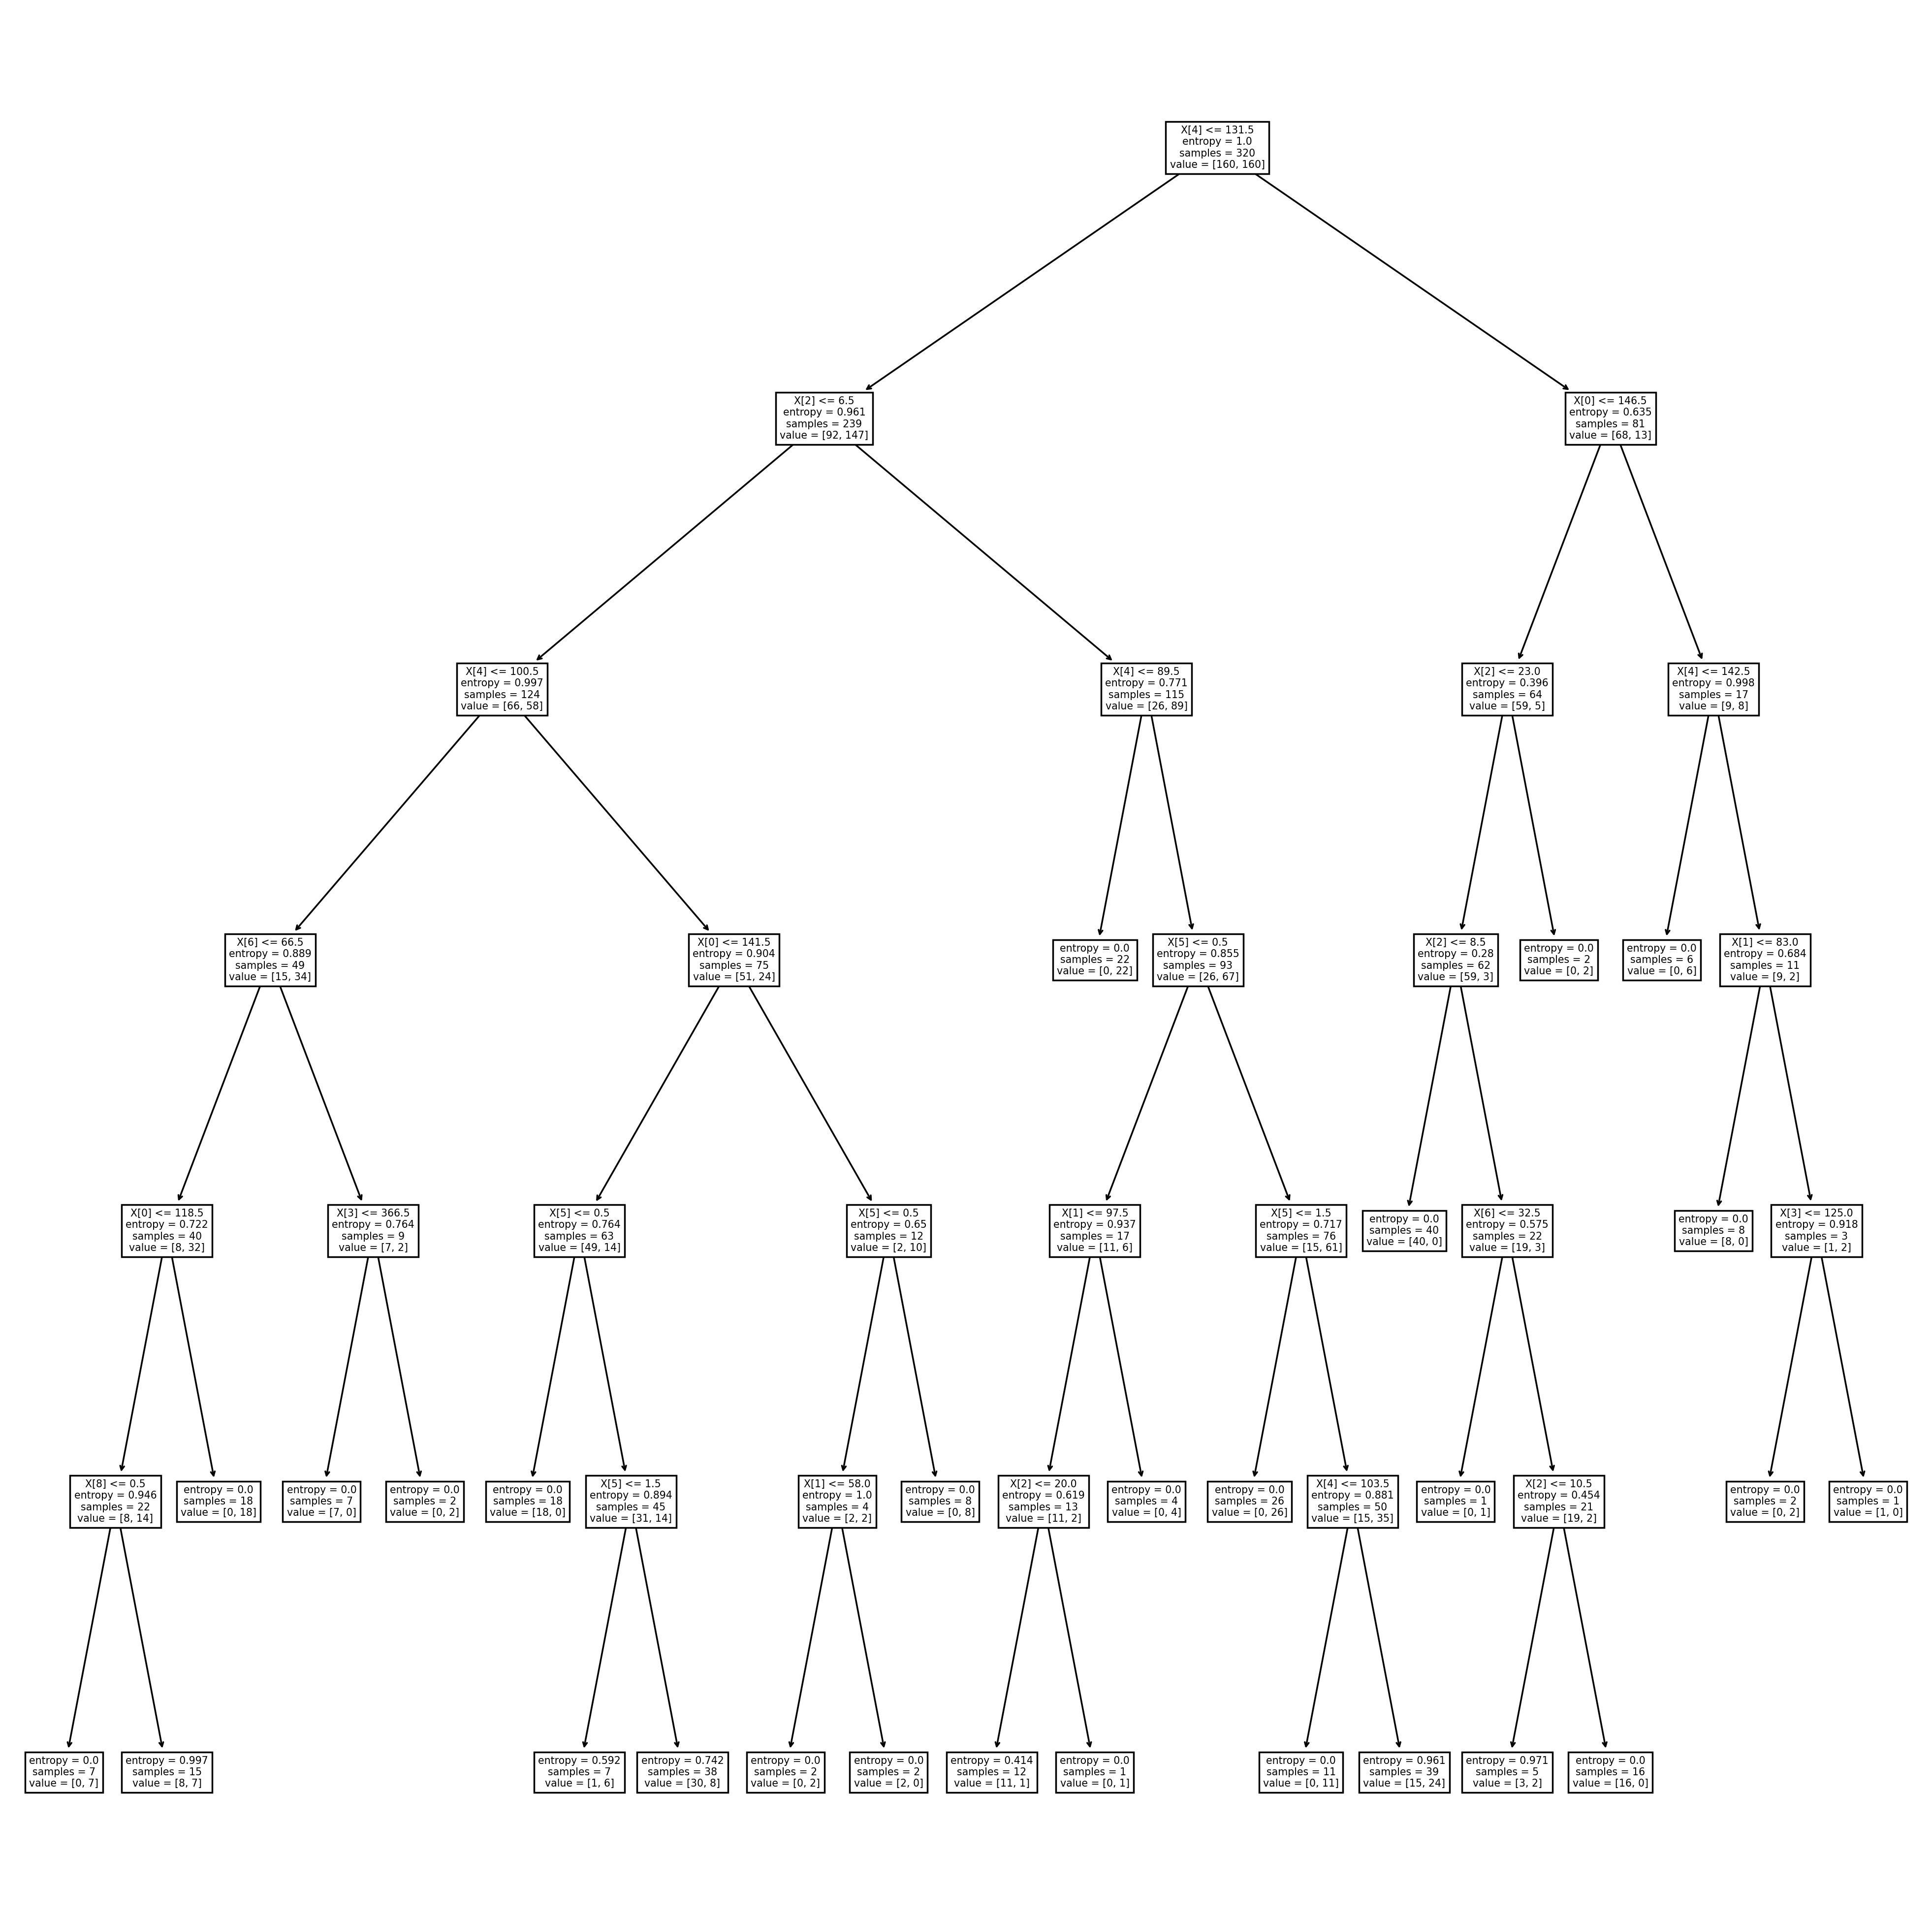

In [101]:
#PLot the decision tree
tree.plot_tree(model);

In [102]:
model.fit(xtrain,ytrain)
ypred = model.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.72      0.80      0.76        41
           1       0.76      0.67      0.71        39

    accuracy                           0.74        80
   macro avg       0.74      0.74      0.74        80
weighted avg       0.74      0.74      0.74        80



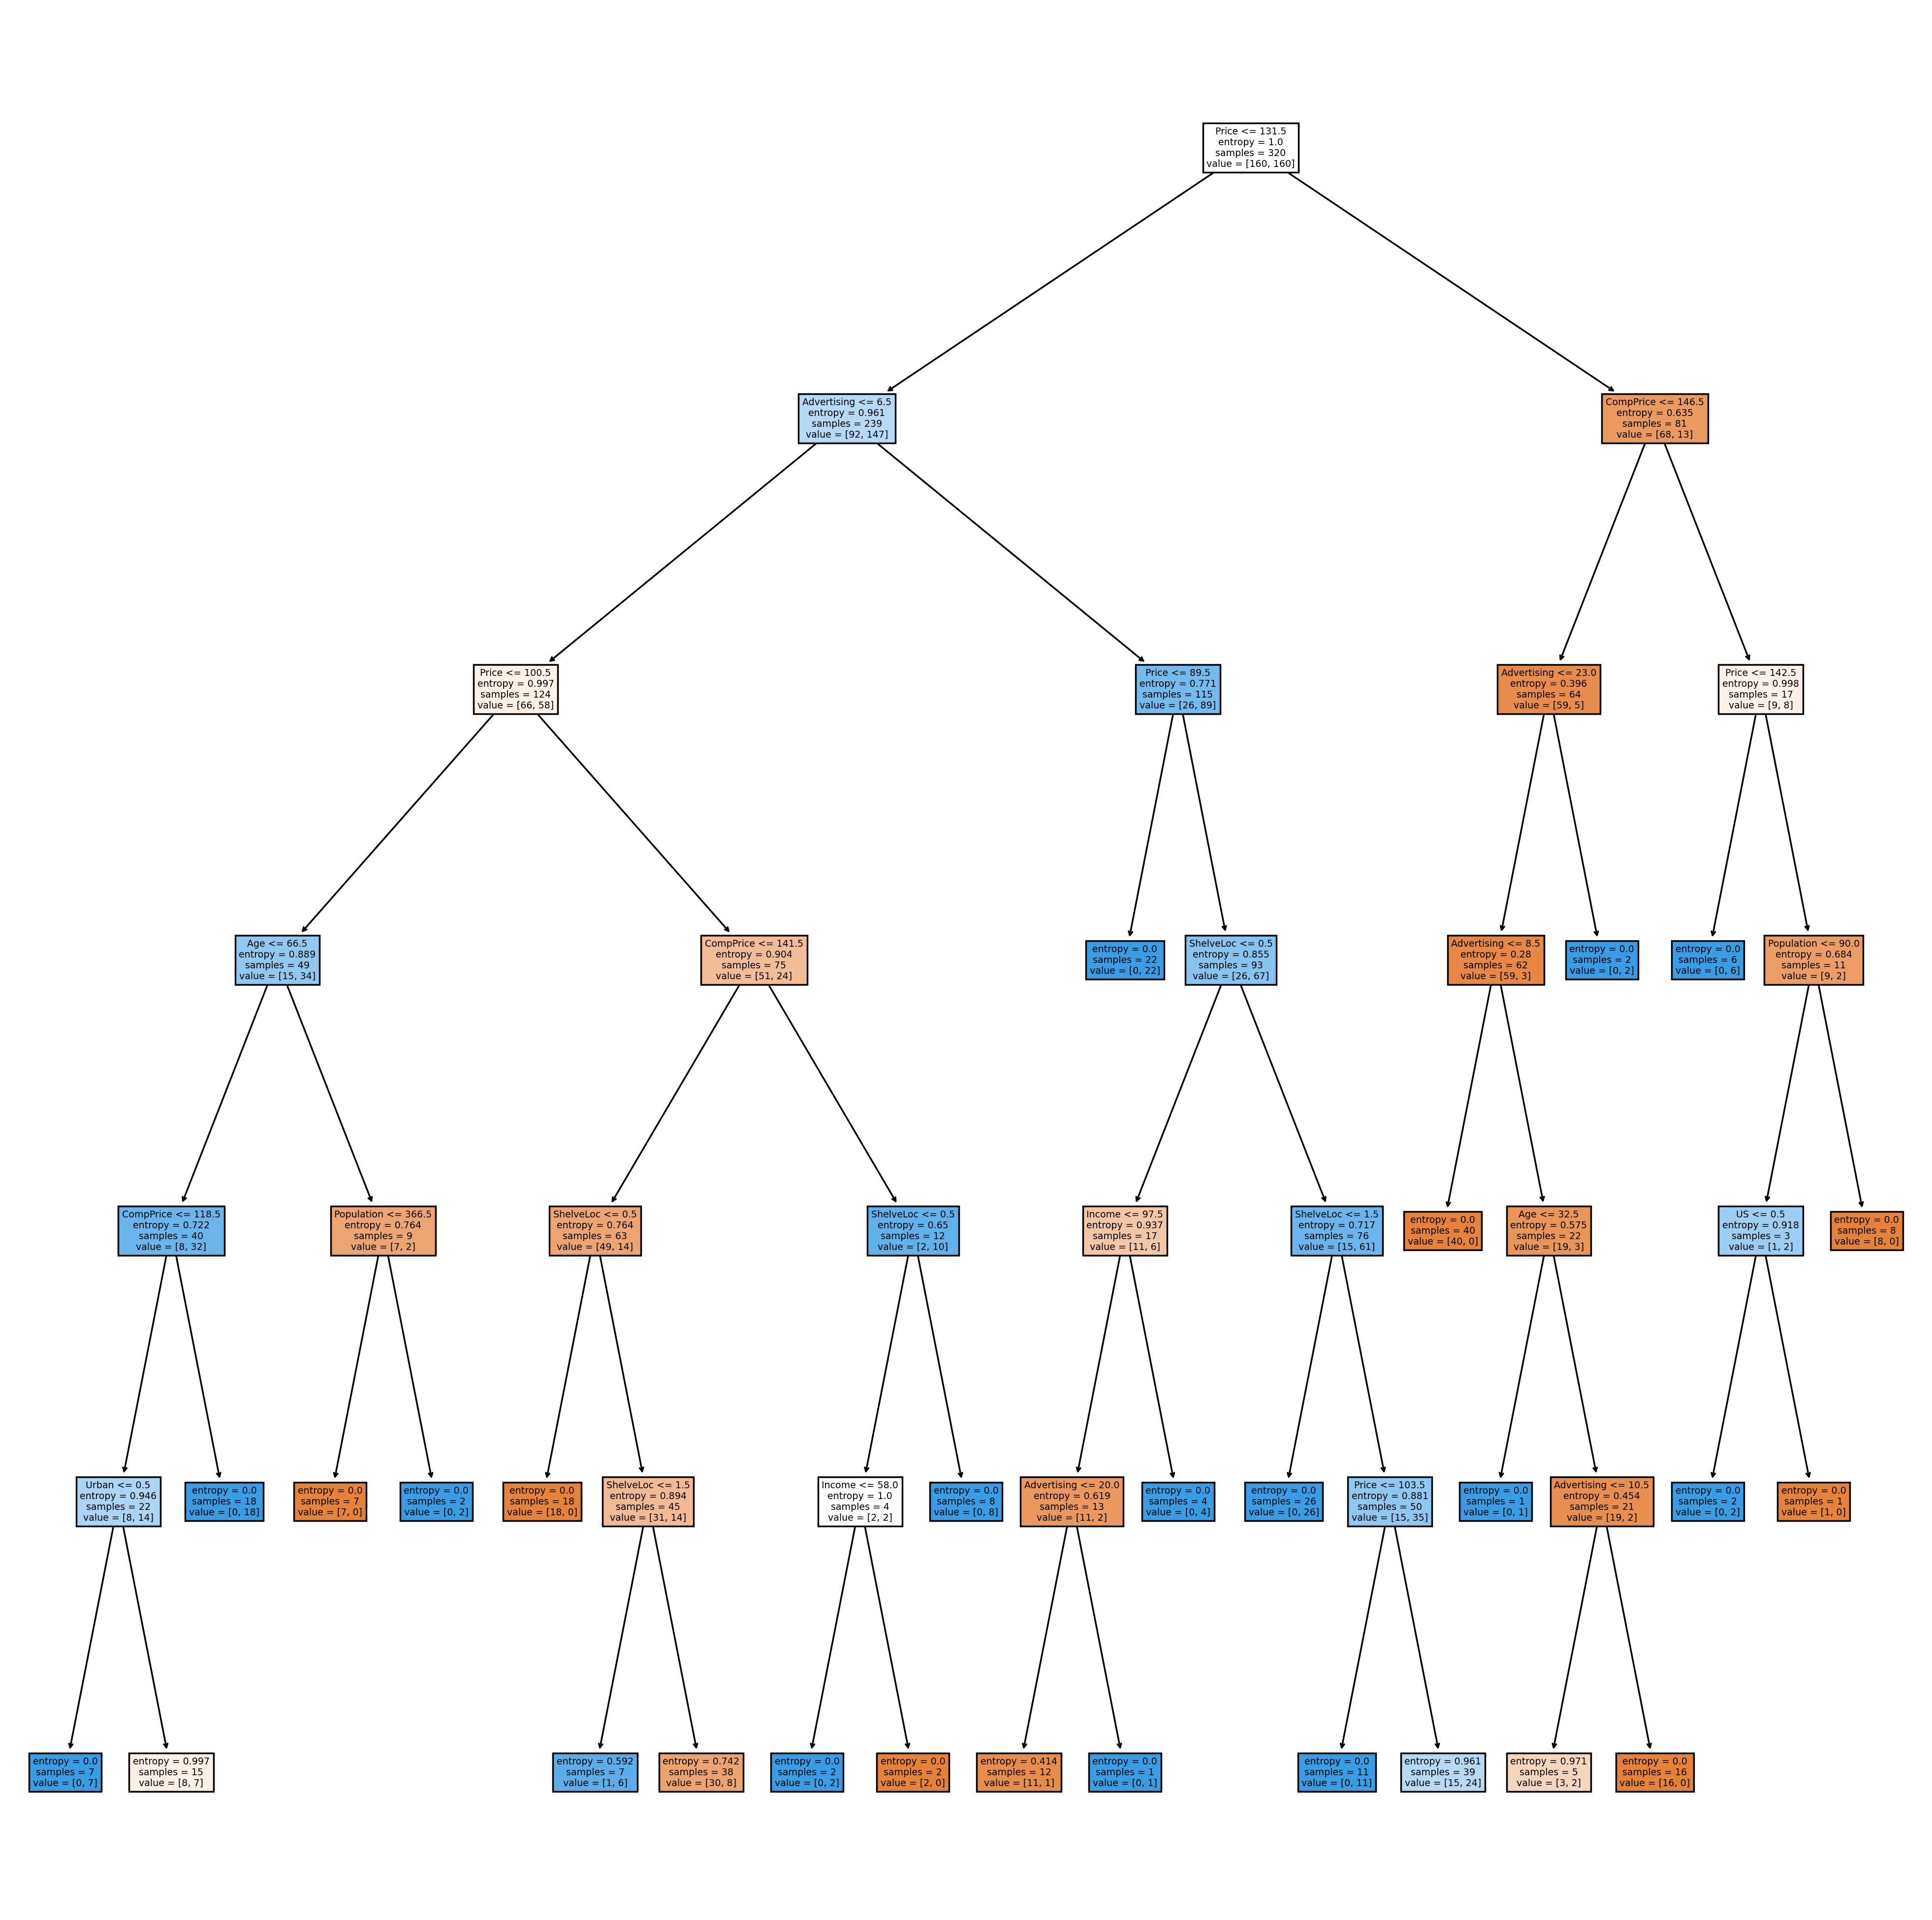

In [103]:
plt.rcParams['figure.figsize'] = (20,20)
plt.rcParams['figure.dpi'] = 250
tree.plot_tree(model, feature_names=x.columns,filled=True)
plt.show()

In [104]:
print("Training Accuracy:",model.score(xtrain,ytrain))
print("Testing Accuracy:" ,model.score(xtest,ytest))

Training Accuracy: 0.89375
Testing Accuracy: 0.7375


In [105]:
text = tree.export_text(model,max_depth=3)  
print(text) 

|--- feature_4 <= 131.50
|   |--- feature_2 <= 6.50
|   |   |--- feature_4 <= 100.50
|   |   |   |--- feature_6 <= 66.50
|   |   |   |   |--- truncated branch of depth 3
|   |   |   |--- feature_6 >  66.50
|   |   |   |   |--- truncated branch of depth 2
|   |   |--- feature_4 >  100.50
|   |   |   |--- feature_0 <= 141.50
|   |   |   |   |--- truncated branch of depth 3
|   |   |   |--- feature_0 >  141.50
|   |   |   |   |--- truncated branch of depth 3
|   |--- feature_2 >  6.50
|   |   |--- feature_4 <= 89.50
|   |   |   |--- class: 1
|   |   |--- feature_4 >  89.50
|   |   |   |--- feature_5 <= 0.50
|   |   |   |   |--- truncated branch of depth 3
|   |   |   |--- feature_5 >  0.50
|   |   |   |   |--- truncated branch of depth 3
|--- feature_4 >  131.50
|   |--- feature_0 <= 146.50
|   |   |--- feature_2 <= 23.00
|   |   |   |--- feature_2 <= 8.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_2 >  8.50
|   |   |   |   |--- truncated branch of depth 3
|   |   |--- feature

In [106]:
model.feature_importances_ 

array([0.12937417, 0.05267199, 0.16821333, 0.05167812, 0.33800035,
       0.17349742, 0.04837392, 0.        , 0.02596757, 0.01222313])

In [107]:
import pandas as pd
feature_imp = pd.Series(model.feature_importances_,index=x.columns).sort_values(ascending=False) 
feature_imp

Price          0.338000
ShelveLoc      0.173497
Advertising    0.168213
CompPrice      0.129374
Income         0.052672
Population     0.051678
Age            0.048374
Urban          0.025968
US             0.012223
Education      0.000000
dtype: float64

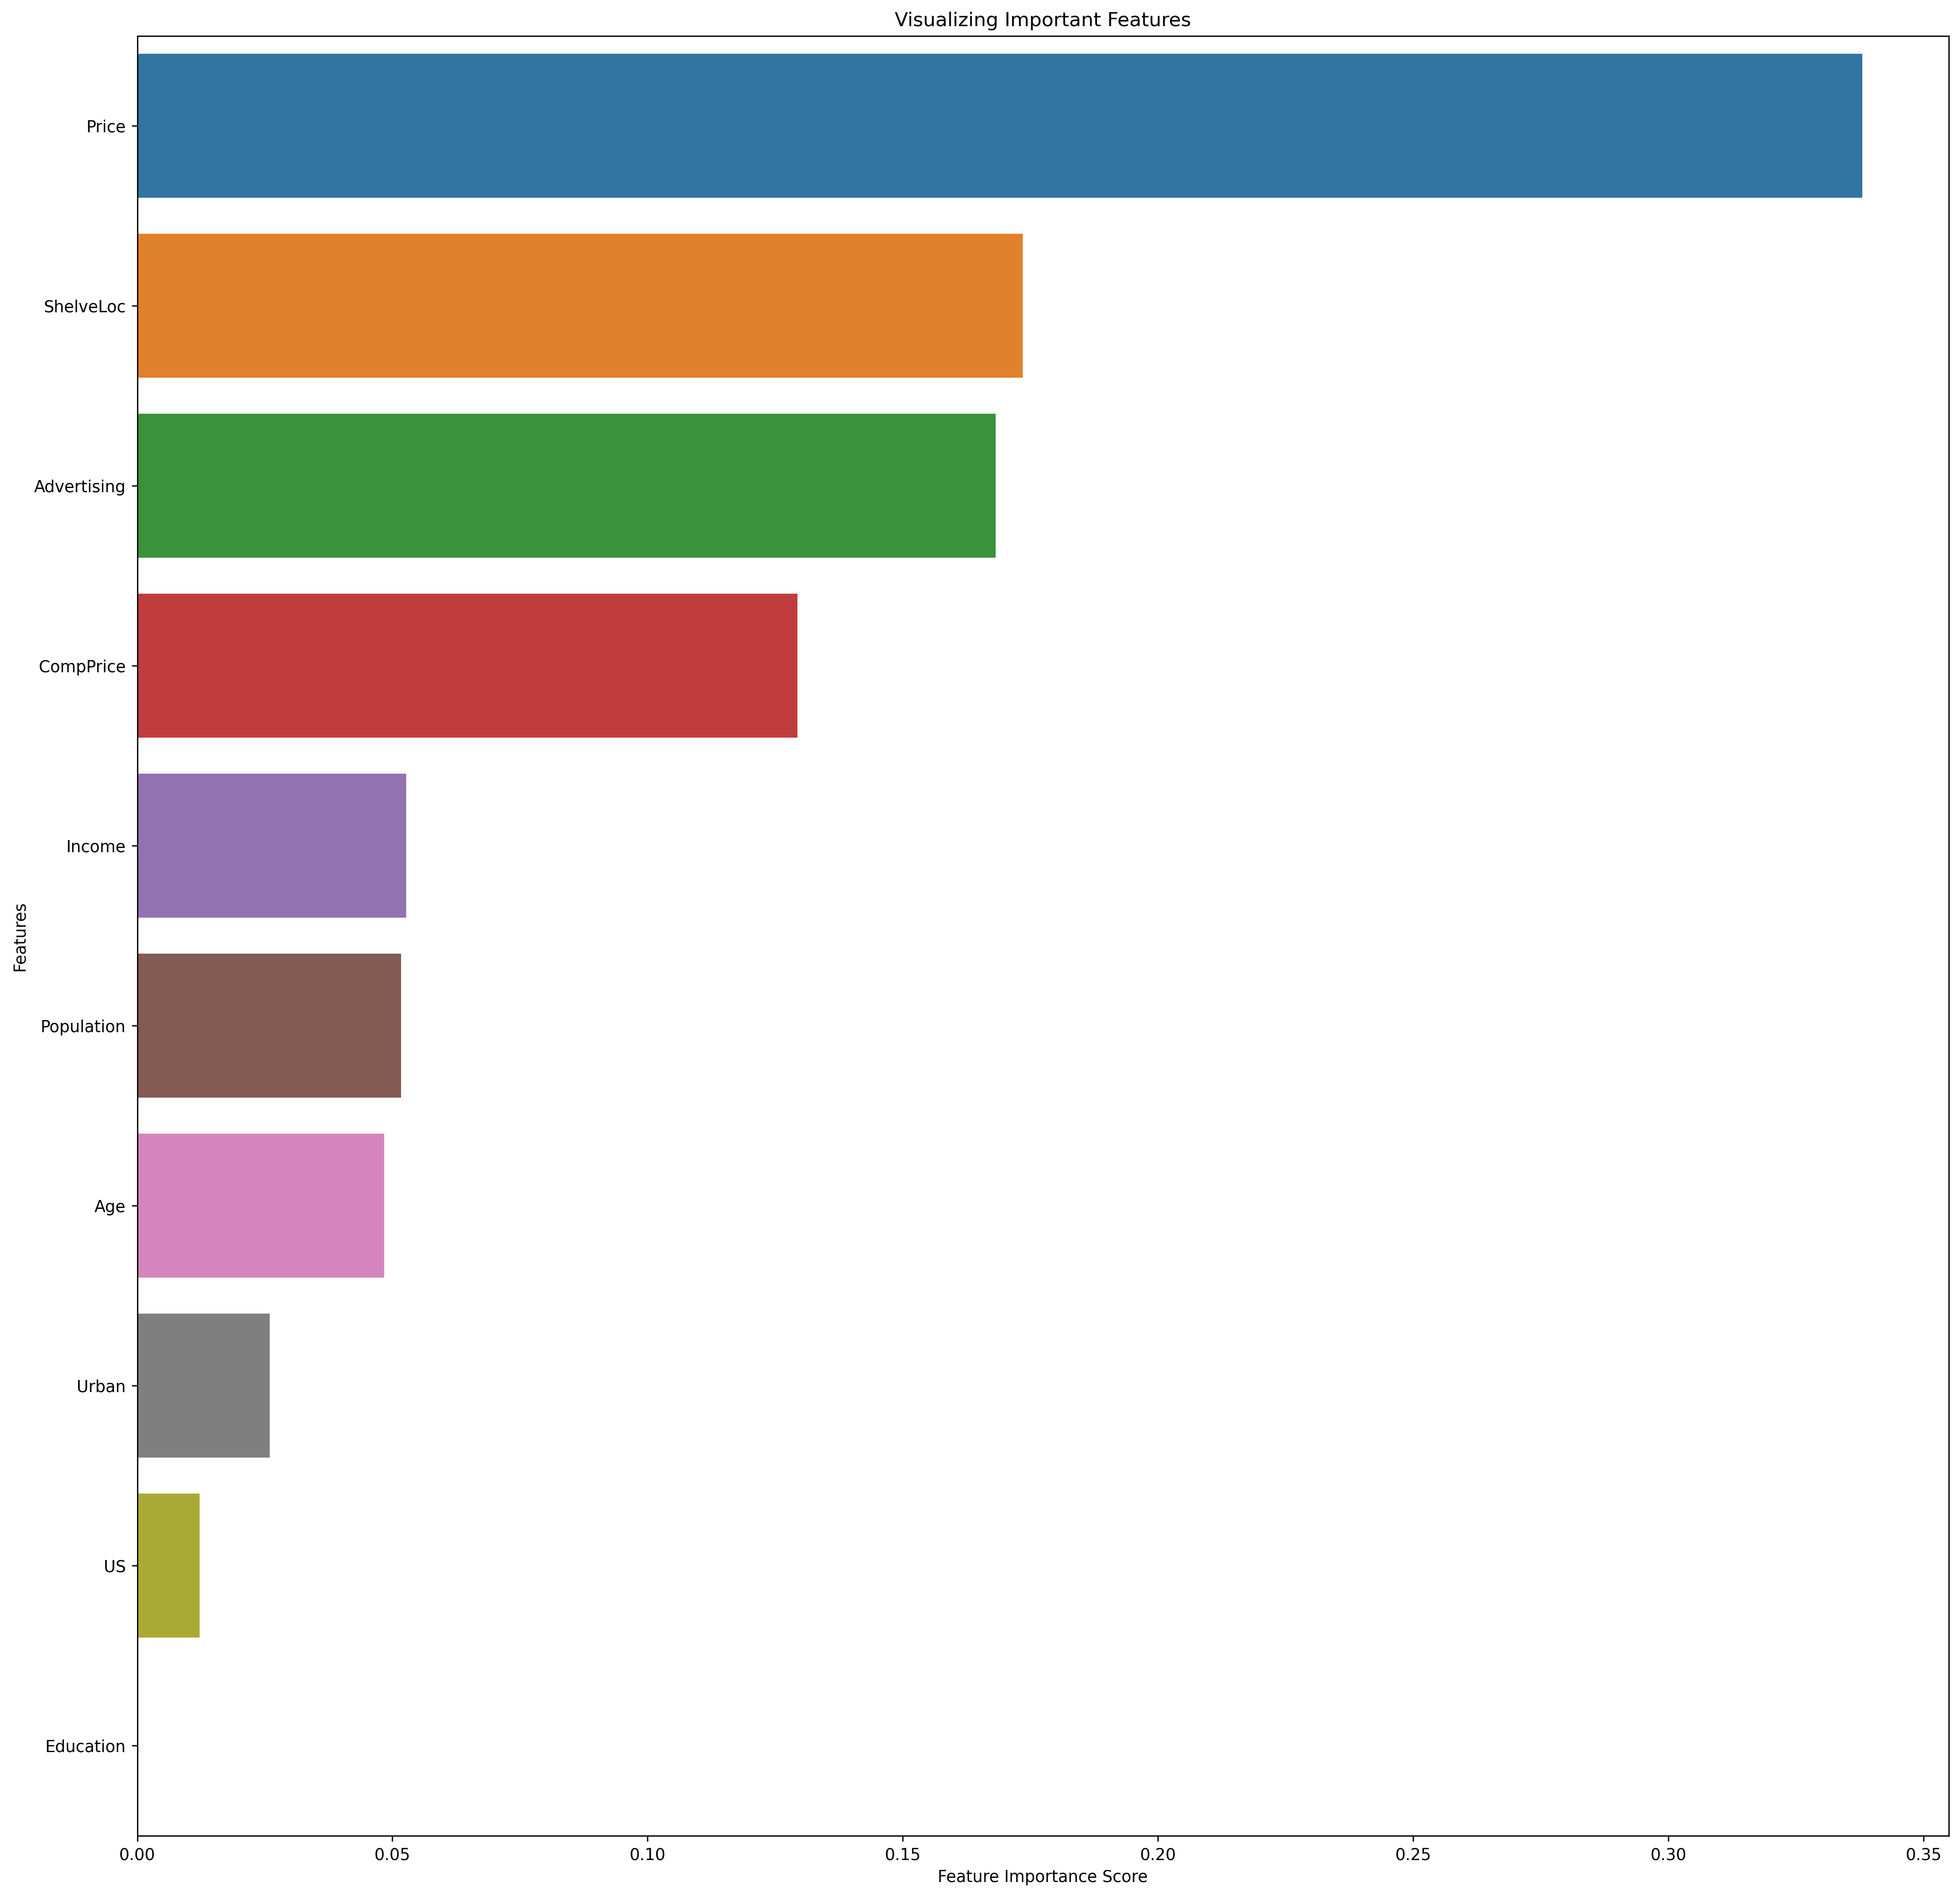

In [108]:
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [109]:
#Predicting on test data
preds = model.predict(xtest) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category  

0    46
1    34
dtype: int64

In [110]:
preds 

array([1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1])

In [111]:
pd.crosstab(ytest,preds)  # getting the 2 way table to understand the correct and wrong predictions

col_0   0   1
Sales        
0      33   8
1      13  26

In [112]:
# Accuracy 
np.mean(preds==ytest)

0.7375

# Building Decision Tree Classifier (CART) using Gini Criteria

In [113]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3) 

In [114]:
model_gini.fit(xtrain, ytrain) 

DecisionTreeClassifier(max_depth=3)

In [115]:
#Prediction and computing the accuracy
pred=model.predict(xtest)
np.mean(preds==ytest) 

0.7375